# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [2]:

# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

All data get stored in a python object InputData. Therefore we can use python serialization to save the input of the models. In the next chapter we will see different ways to create data but for this example we will use a stored one

In [3]:
geo_data = gp.read_pickle('geo_data.pickle')
geo_data.n_faults = 0
print(geo_data)

In [4]:
data_inter= gp.InterpolatorInput(geo_data)

I am in the setting
I am here
[2, 2]


In [5]:
f = data_inter.compile_th_fn(dtype='float64')

In [10]:
i = data_inter.get_input_data()

[9]


In [11]:
data_inter.interpolator._grid_scaled

In [12]:
data_inter.set_interpolator(dtype='float64')

I am in update


In [13]:
f(*i)

array([[[ 3.        ,  3.        ,  3.        , ...,  1.        ,
          1.        ,  1.        ],
        [-0.14374799, -0.15055202, -0.15698244, ..., -0.00479593,
          0.00552304,  0.01607364],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)

In [13]:
type(i)

list

In [14]:
*i

SyntaxError: can't use starred expression here (<ipython-input-14-b9df28f5df19>, line 1)

This geo_data object contains essential information that we can access through the correspondent getters. Such a the coordinates of the grid.

In [7]:
print(gp.get_grid(geo_data))

[[    0.             0.         -2000.        ]
 [    0.             0.         -1959.18371582]
 [    0.             0.         -1918.36730957]
 ..., 
 [ 2000.          2000.           -81.63265228]
 [ 2000.          2000.           -40.81632614]
 [ 2000.          2000.             0.        ]]


The main input the potential field method is the coordinates of interfaces points as well as the orientations. These pandas dataframes can we access by the following methods:

#### Interfaces Dataframe

In [8]:
gp.get_raw_data(geo_data, 'interfaces').head()

,X,Y,Z,formation,series,order_series
21,600.0,1000.0,-650.0,Seal,Rest,2
22,1300.0,1000.0,-700.0,Seal,Rest,2
23,1600.0,1000.0,-800.0,Seal,Rest,2
24,1900.0,1000.0,-900.0,Seal,Rest,2
25,2000.0,1000.0,-875.0,Seal,Rest,2


#### Foliations Dataframe

In [9]:
gp.get_raw_data(geo_data, 'foliations').head()

,X,Y,Z,azimuth,dip,polarity,formation,series,order_series,G_x,G_y,G_z
0,1450.0,1000.0,-1150.0,90.0,18.435,1,Reservoir,Rest,2,0.316229,1.936342e-17,0.948683


It is important to notice the columns of each data frame. These not only contains the geometrical properties of the data but also the **formation** and **series** at which they belong. This division is fundamental in order to preserve the depositional ages of the setting to model.

A projection of the aforementioned data can be visualized in to 2D by the following function. It is possible to choose the direction of visualization as well as the series:

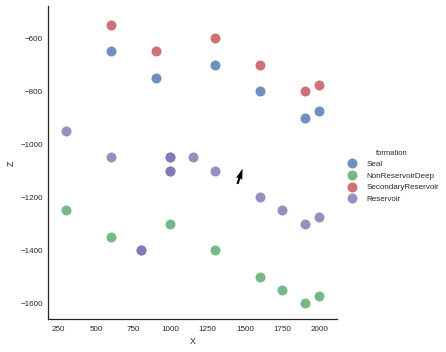

In [10]:
gp.plot_data(geo_data, direction='y',
            series ='Rest')

GemPy supports visualization in 3D as well trough vtk.

In [3]:
gp.plot_data_3D(geo_data)

UnboundLocalError: local variable 'renwin' referenced before assignment

## The ins and outs of Input data objects

In [11]:
gp.set_interpolator?

In [5]:
# Select series to interpolate (if you do not want to interpolate all)
data_interp = gp.set_interpolator(geo_data,
                                     verbose = ['potential_field_at_interfaces'],
                                    dtype='float64')

# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep(u_grade=[3]) 

I am here
[2, 2]
[3]


In [10]:
#then we compile we have to pass the number of formations that are faults!!
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(0), on_unused_input='ignore', 
                            allow_input_downcast=True, profile=True);

In [7]:
import theano

In [9]:
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

TypeError: Bad input argument to theano function with name "<ipython-input-8-4db2810bef76>:3" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-9daca5a9db29>", line 4, in <module>
    dtype='float64')
  File "../gempy/GemPy_f.py", line 266, in set_interpolator
    *args, **kwargs)
  File "../gempy/DataManagement.py", line 553, in __init__
    self.tg = theanograf.TheanoGraph_pro(dtype=dtype, verbose=verbose,)
  File "../gempy/theanograf.py", line 94, in __init__
    self.dips_position_all = T.matrix("Position of the dips")
TensorType(float32, matrix) cannot store a value of dtype float64 without risking loss of precision. If you do not mind this loss, you can: 1) explicitly cast your data to float32, or 2) set "allow_input_downcast=True" when calling "function". Value: "array([[ 0.57702308,  0.5001    ,  0.48086923]])"

In [6]:
f = gp.compile_th_fn(geo_data)

I am here
[2, 2]


In [9]:
data_interp = gp.set_interpolator(geo_data,
                                     verbose = ['potential_field_at_interfaces'],
                                    dtype='float64')

# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep(u_grade=[3]) 

I am here
[2, 2]
[3]


In [26]:
print(type(geo_data))

<class 'gempy.DataManagement.InputData'>


In [29]:
isinstance(geo_data, gp.DataManagement.InputData)

True

In [24]:
type(geo_data) == 'gempy.DataManagement.InputData'

False

In [11]:

sol = f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

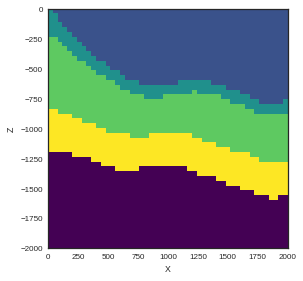

In [16]:

gp.plot_section(geo_data, 23, sol[0,0,:])